In [1]:
pip install finance-datareader

In [2]:
pip install plotly==4.14.3

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_0926_20210318.csv",encoding = 'cp949')

In [6]:
df.head()

,종목코드,종목명,시장구분,소속부,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,060310,3S,KOSDAQ,중견기업부,2435,15,0.62,2430,2455,2370,169436,408955100,109094114285,44802511
1,095570,AJ네트웍스,KOSPI,NaN,4275,100,2.40,4190,4350,4170,264377,1125381560,200165311125,46822295
2,006840,AK홀딩스,KOSPI,NaN,30050,0,0.00,29900,30350,29650,51870,1559383400,398089208050,13247561
3,054620,APS홀딩스,KOSDAQ,중견기업부,8400,210,2.56,8220,8480,8040,440786,3656740780,171311456400,20394221
4,265520,AP시스템,KOSDAQ,우량기업부,28900,-450,-1.53,29400,29400,28650,181464,5250330800,418478560300,14480227


In [7]:
kospi = df[df['시장구분'] =='KOSPI']

In [8]:
kospi['소속부'].value_counts()

Series([], Name: 소속부, dtype: int64)

In [9]:
not_use_columns = ["소속부","종가","대비","시가","고가","저가","거래량","거래대금","상장주식수"]
kospi = kospi.drop(not_use_columns, axis=1)

In [10]:
kospi.head()

,종목코드,종목명,시장구분,등락률,시가총액
1,095570,AJ네트웍스,KOSPI,2.40,200165311125
2,006840,AK홀딩스,KOSPI,0.00,398089208050
6,027410,BGF,KOSPI,0.00,618330469860
7,282330,BGF리테일,KOSPI,-1.45,2929622067000
8,138930,BNK금융지주,KOSPI,0.61,2160950680980


In [11]:
stocks = fdr.StockListing('KOSPI')
stocks.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [12]:
sector = stocks[["Symbol","Sector"]]

In [13]:
sector = sector.to_numpy()

In [14]:
def make_sector(code):
  for i in range(len(sector)):
    if code == sector[i][0]:
      return sector[i][1]
  return 'No'

In [15]:
kospi["섹터"] = kospi["종목코드"].map(make_sector)

In [16]:
kospi.head()

,종목코드,종목명,시장구분,등락률,시가총액,섹터
1,095570,AJ네트웍스,KOSPI,2.40,200165311125,산업용 기계 및 장비 임대업
2,006840,AK홀딩스,KOSPI,0.00,398089208050,기타 금융업
6,027410,BGF,KOSPI,0.00,618330469860,기타 금융업
7,282330,BGF리테일,KOSPI,-1.45,2929622067000,종합 소매업
8,138930,BNK금융지주,KOSPI,0.61,2160950680980,기타 금융업


In [17]:
kospi = kospi.fillna('우선주')

In [18]:
fig = px.treemap(kospi, path=['시장구분','섹터','종목명'], values='시가총액',
                  color='등락률', hover_data=['등락률','종목코드'],
                 range_color=(-0.3,0.3),color_continuous_scale='balance')
fig.update_traces(textposition='middle center',text = kospi['등락률'])
fig.update_traces(textfont_color='white',textfont_size=25)
fig.write_html('Treemap.html')

In [19]:
fig.show()

# github용 plotly chart ( 깃허브에서 plotly가 호환되지 않아서, 이미지로 대체 )

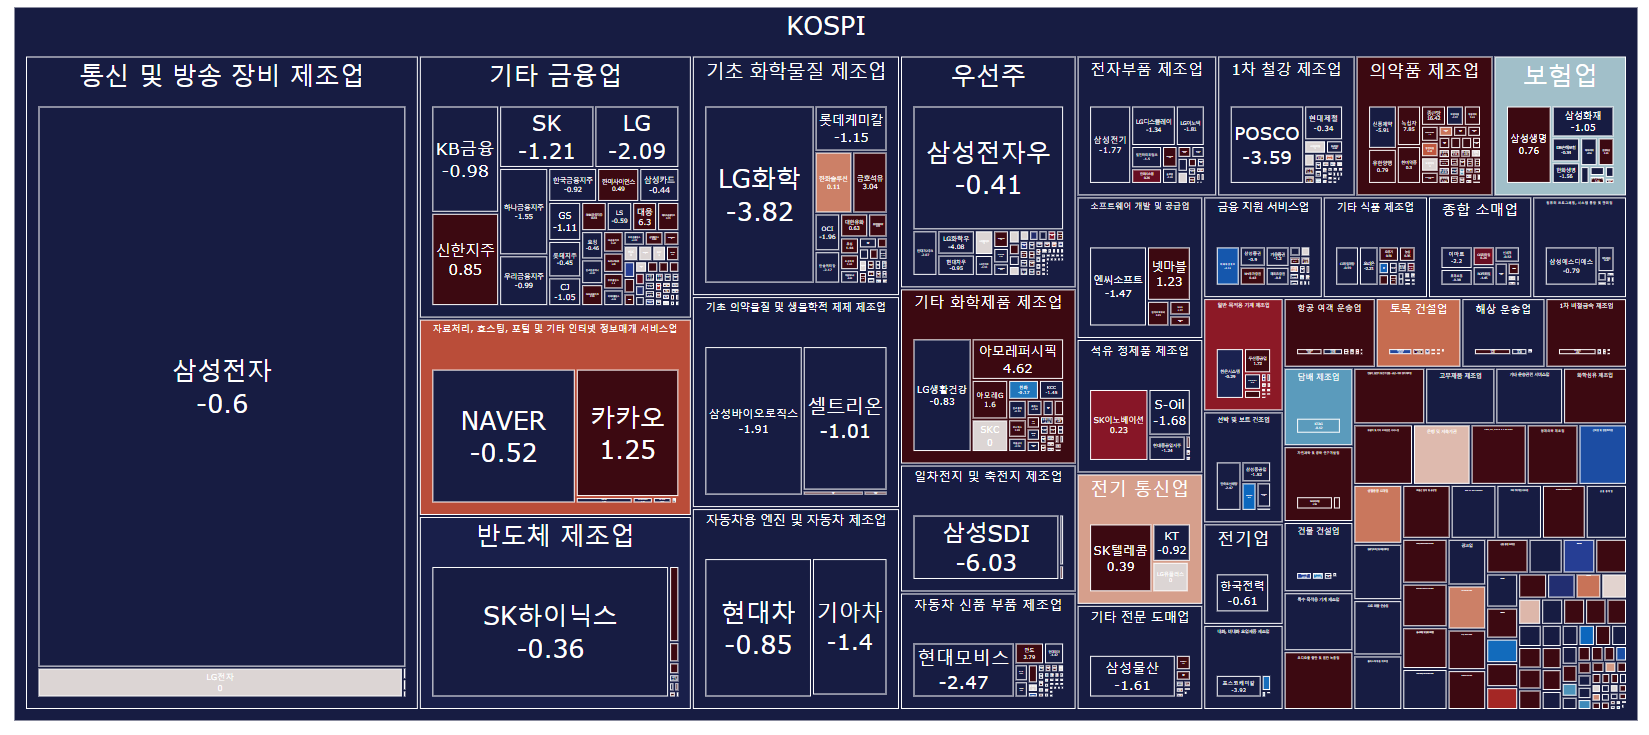